# Polynomial Regression

=== Polynomial Regression ===
Degree: 10
Coefficient of Determination (R²): 0.9727991453657681
Intercept: -77077.60270150709
Coefficients: [ 0.00000000e+00  9.54117234e-27 -1.69258365e-31  3.00926554e-36
  6.92498994e-33  1.14923931e-29  1.64788920e-26  1.91444235e-23
  1.45252241e-20 -1.30224613e-23  2.95519238e-27]


Predicted y (Polynomial Regression):
 [  4.24156376   5.76560574  28.83776119  32.61281003 168.85853537]


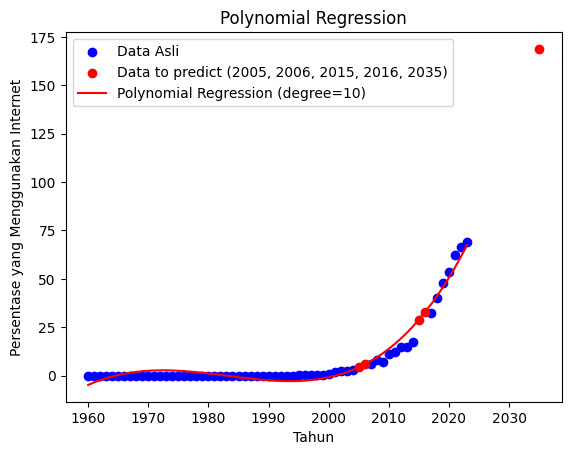

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# baca data dari CSV
data = pd.read_csv('Data Tugas Pemrograman A.csv', usecols=[0, 1])


# ambil X dan Y
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values


# derajat polinomial yang digunakan
degree = 10


# transformasi polinomial
poly_transformer = PolynomialFeatures(degree=degree, include_bias=True)
x_poly = poly_transformer.fit_transform(x)

# latih model regresi linier
model = LinearRegression().fit(x_poly, y)
r_sq = model.score(x_poly, y)


# output model
print("=== Polynomial Regression ===")
print(f"Degree: {degree}")
print(f"Coefficient of Determination (R²): {r_sq}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


# prediksi
#[2005-1960]
x_to_pred = np.array([[2005], [2006], [2015], [2016], [2035]])
x_poly_to_pred = poly_transformer.fit_transform(x_to_pred)
y_poly_to_pred = model.predict(x_poly_to_pred)

y_poly_pred = model.predict(x_poly)
print("\n\nPredicted y (Polynomial Regression):\n",y_poly_to_pred)

# plot hasil
sorted_indices = np.argsort(x.flatten())
x_sorted = x[sorted_indices]
y_poly_sorted = y_poly_pred[sorted_indices]


pred_sorted_indices = np.argsort(x_to_pred.flatten())
pred_x_sorted = x_to_pred[pred_sorted_indices]
pred_y_poly_sorted = y_poly_to_pred[pred_sorted_indices]

plotline_x = 0
plotline_y = 0

#print data asli
plt.scatter(x, y, color='blue', label='Data Asli')
#print data prediksi
plt.scatter(pred_x_sorted, pred_y_poly_sorted, color='red', label=f'Data to predict (2005, 2006, 2015, 2016, 2035)')
#print plotline
plt.plot(x_sorted, y_poly_sorted, color='red', label=f'Polynomial Regression (degree={degree})')

#extra labeling
plt.xlabel('Tahun')
plt.ylabel('Persentase yang Menggunakan Internet')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


# **Referensi:**
- https://realpython.com/linear-regression-in-python/#multiple-linear-regression-with-scikit-learn